In [96]:
#load necessary libraries
import pandas as pd
import numpy as np
#import pyspark.pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

from xgboost import XGBClassifier

In [63]:
sns.set(rc={'figure.figsize':(15,5)})

In [64]:
#read in the datasets
df_train = pd.read_csv('../input/human-activity-recognition-with-smartphones/train.csv')
df_test = pd.read_csv('../input/human-activity-recognition-with-smartphones/test.csv')

In [65]:
print(f'Train data shape: {df_train.shape}')
print(f'Test data shape: {df_test.shape}')

Train data shape: (7352, 563)
Test data shape: (2947, 563)


In [66]:
#show 5 data points
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [67]:
#number of activity classes 
df_train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [68]:
print(f"Total number of null entries in train dataframe: {df_train.isnull().sum().sum()}")
print(f"Total number of null entries in test dataframe: {df_test.isnull().sum().sum()}")

Total number of null entries in train dataframe: 0
Total number of null entries in test dataframe: 0


<AxesSubplot:xlabel='Activity', ylabel='count'>

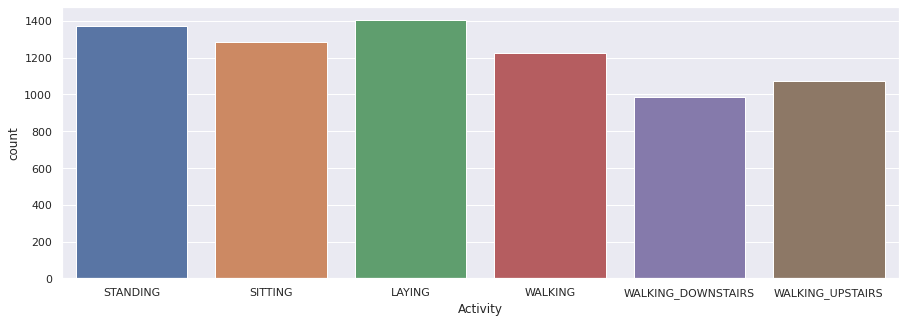

In [71]:
#plot class imbalances
sns.countplot(data=df_train, x = 'Activity')

In [75]:
#now encode the classes as numbers
df_train['Activity'] = df_train['Activity'].astype("category")
df_train['Activity'] = df_train['Activity'].cat.codes

df_test['Activity'] = df_test['Activity'].astype("category")
df_test['Activity'] = df_test['Activity'].cat.codes

In [80]:
#convert the dataframe to numpy array for training
X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]

X_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]

In [91]:
#train the xgboost model
xgb = XGBClassifier(n_estimators = 200, max_depth = 6)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [92]:
#score
xgb.score(X_test, y_test)

0.9358669833729216

In [101]:
#make predictions on X_test
y_pred = xgb.predict(X_test)

In [100]:
#print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.84      0.88       491
           2       0.87      0.94      0.90       532
           3       0.93      0.98      0.95       496
           4       0.97      0.92      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.93      0.94      2947
weighted avg       0.94      0.94      0.94      2947



## The next step is to do a correlation analysis, and use only the important features that have significant impact on the classes. This will reduce a massive amount of calculation without hurting the performance of the model. 